#### 704845912 Seungwoo Hong STATS C161 Homework 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from sklearn import linear_model, datasets
from numpy.linalg import inv
import seaborn as sns
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets, linear_model

## 1. Simulating K-means.

#### (a) Generate 300 random samples xi = (xi0,xi1) from this model. Plot the points using a scatter plot with a different color for each cluster.

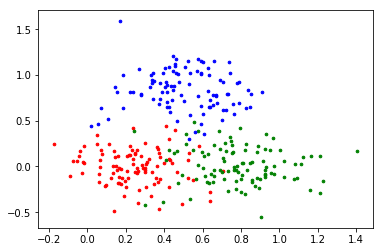

In [21]:
np.random.seed(1) 
centers = [(0.2, 0), (0.8, 0), (0.5, 0.8)]

X, Y = make_blobs(n_samples=300, n_features=2, cluster_std=0.2,
                  centers=centers, shuffle=False)


colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(3):
    points = np.array([X[j] for j in range(len(X)) if Y[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

#### (b)

In [3]:
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
indhat = kmeans.predict(X)

muhat = kmeans.cluster_centers_
muhat

array([[0.51489129, 0.85341695],
       [0.80445282, 0.00842963],
       [0.23129114, 0.01654251]])

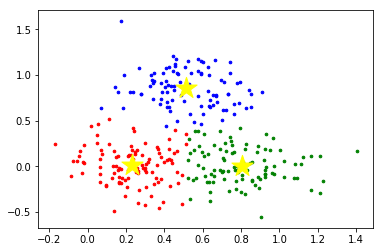

In [4]:
colors = ['b', 'g', 'r']
fig, ax = plt.subplots()
for i in range(3):
    points = np.array([X[j] for j in range(len(X)) if indhat[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
ax.scatter(muhat[:, 0], muhat[:, 1], marker='*', c='yellow', s=500)

#### (c)

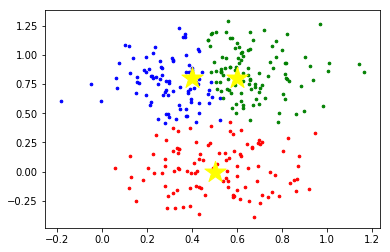

In [23]:
np.random.seed(3) 
newcenters = np.array([(0.4,0.8),(0.6,0.8),(0.5,0)])

newkmeans = KMeans(n_clusters = 3, init = newcenters, n_init=1)
newkmeansfit = newkmeans.fit(X)
newindhat = newkmeansfit.predict(X)

newmuhat = newkmeans.cluster_centers_

colors = ['b', 'g', 'r']
ffig, axx = plt.subplots()
for i in range(3):
    points = np.array([X[j] for j in range(len(X)) if newindhat[j] == i])
    axx.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])  
axx.scatter(newcenters[:, 0], newcenters[:, 1], marker='*', c='yellow', s=500)

## 2. Formulating multivariable problems.

#### (a) 

In the linear model, predicted sales of a product is the target variable. Product type and the product reviews, and past sales can be predictor variables. 'past sales' is numeric variable while 'product type' is categorical variable. 

#### (b) 


There might be some interaction effect between numeric review rating and frequency of certain keywords such as good or bad. We can classify the reviews as numeric values like -1 ~ 1 so that it can be multiplied by the score. 

#### (c)

We have to scale all the numeric variables in a single scale because a numeric variable with larger data range could result in having more effect in the linear model. To have their effects equally, set all of them as 0-5 scale.

#### (d)

I would have all of them have 0-5 score variable. For the review just having good or bad, being 'good' product is estimated to certain numeric value. Let's say good is 3.8 and bad is 1.6, these numbers are plugged in the variable. If a review has neutral comments and no rating, plug in the average of the review score. 

## 3. Performing the least squares solution.

#### (a)

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + e$

#### (b)

In [6]:
x = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]])
y = np.array([[1], [4], [3], [7]])

In [7]:
inv(x.transpose().dot(x)).dot(x.transpose()).dot(y) 
# Estimates for beta0, beta1, and beta2

array([[1.4],
       [1.4],
       [2.2]])

#### (c)

In [8]:
1.4 + 1.4*0.5 + 2.2*1.5

5.4

## 6. Model order selection.

/Users/seungwoohong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
/Users/seungwoohong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


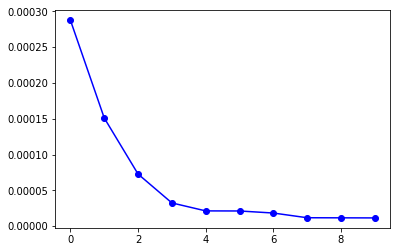

In [9]:
from sklearn.model_selection import train_test_split

# Arbitrary tiny dataset 
xx = np.array([ 3.08,  3.1 ,  3.12,  3.14,  3.16,  3.18,  3.2 ,  3.22,  3.24,
    3.26,  3.28,  3.3 ,  3.32,  3.34,  3.36,  3.38,  3.4 ,  3.42,
    3.44,  3.46,  3.48,  3.5 ,  3.52,  3.54,  3.56,  3.58,  3.6 ,
    3.62,  3.64,  3.66,  3.68])
yy = np.array([ 0.000857,  0.001182,  0.001619,  0.002113,  0.002702,  0.003351,
    0.004062,  0.004754,  0.00546 ,  0.006183,  0.006816,  0.007362,
    0.007844,  0.048207,  0.058474,  0.038541,  0.038539,  0.028445,
    0.008251,  0.007974,  0.007608,  0.007193,  0.006752,  0.006269,
    0.005799,  0.005302,  0.004822,  0.004339,  0.00391 ,  0.003481,
    0.003095])

xtr, xts, ytr, yts = train_test_split(xx, yy, test_size=0.5, shuffle=False)

dtest = np.array(range(0,10))
RSStest = []
RSStr = []

for d in dtest:
    beta_hat = np.polyfit(xtr, ytr, d)
    
    yhat = np.polyval(beta_hat, xtr)
    RSSd = np.mean((yhat-ytr)**2)
    RSStr.append(RSSd)
    
    yhat = np.polyval(beta_hat, xts)
    RSSd = np.mean((yhat-yts)**2)
    RSStest.append(RSSd)

plt.plot(dtest, RSStr, 'bo-')

4th order has almost the smallest RSS with least complexity. 